In [23]:
# MANIPULAÇÃO DOS DADOS
import pandas as pd

# MANIPULAÇÃO DE ARRAY
import numpy as np

# BIBLIOTECA DE GRÁFICOS
import matplotlib.pyplot as plt

# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [167]:
names= ['Classificacao','Alcool','AcidoMalico','Cinza','AlcalinidadeCinzas','Magnesio','FenoisTotais','Flavonoides','FenoisNaoFlavonoides','Proantocianinas','IntensidadeCor','Matiz','VinhosDiluidos','Prolina']
dfWines = pd.read_csv("wine.data", names=names)

# DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
dfWines['Classificacao']  = dfWines['Classificacao'] - 1

# SHUFFLE NO DF
dfWinesShuffle = dfWines.sample(frac=1, random_state=1).reset_index(drop=True)

In [168]:
dfWinesShuffle.head()

,Classificacao,Alcool,AcidoMalico,Cinza,AlcalinidadeCinzas,Magnesio,FenoisTotais,Flavonoides,FenoisNaoFlavonoides,Proantocianinas,IntensidadeCor,Matiz,VinhosDiluidos,Prolina
0,2,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
1,1,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
2,0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
3,1,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
4,0,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375


In [169]:
dfWinesShuffle

,Classificacao,Alcool,AcidoMalico,Cinza,AlcalinidadeCinzas,Magnesio,FenoisTotais,Flavonoides,FenoisNaoFlavonoides,Proantocianinas,IntensidadeCor,Matiz,VinhosDiluidos,Prolina
0,2,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
1,1,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
2,0,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
3,1,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
4,0,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
174,2,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
175,1,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
176,2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


In [170]:
X_train, X_test, y_train, y_test = train_test_split(dfWinesShuffle.iloc[:,1:13], dfWinesShuffle.iloc[:,0], test_size=0.20, random_state=1)

KMeans_model = KMeans(n_clusters=3, random_state=1)
Y_Predict = KMeans_model.fit_predict(X_train)

In [171]:
KMeans_Prediction = KMeans_model.fit_predict(X_test)
KMeans_Prediction

array([0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

In [172]:
acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)
acuracia

38.89

In [173]:
print(classification_report(y_test, KMeans_Prediction))

              precision    recall  f1-score   support

           0       0.30      0.27      0.29        11
           1       0.50      0.75      0.60        12
           2       0.25      0.15      0.19        13

    accuracy                           0.39        36
   macro avg       0.35      0.39      0.36        36
weighted avg       0.35      0.39      0.36        36



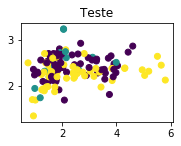

In [174]:
plt.subplot(224)
plt.scatter([X_train.iloc[:,1]], [X_train.iloc[:,2]], c=[Y_Predict])
plt.title("Teste")
plt.show()

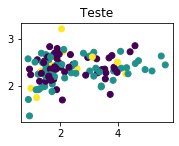

In [180]:
KMeans_Acuracia = 0
KMeans_Seed_00 = 0
KMeans_Seed_01 = 0
KMeans_Seed_02 = 0
names= ['Classificacao','Alcool','AcidoMalico','Cinza','AlcalinidadeCinzas','Magnesio','FenoisTotais','Flavonoides','FenoisNaoFlavonoides','Proantocianinas','IntensidadeCor','Matiz','VinhosDiluidos','Prolina']

for a in range(0,10,1):
    for i in range(0,10,1):
        for z in range(0,10,1):

            # PEGA A BASE
            dfWines = pd.read_csv("wine.data", names=names)

            # DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
            dfWines['Classificacao']  = dfWines['Classificacao'] - 1

            # SHUFFLE NO DF
            dfWinesShuffle = dfWines.sample(frac=1, random_state=a).reset_index(drop=True)

            X_train, X_test, y_train, y_test = train_test_split(dfWines.iloc[:,1:13], dfWines.iloc[:,0], test_size=0.30, random_state=i)

            KMeans_model = KMeans(n_clusters=3, random_state=z)
            Y_Predict = KMeans_model.fit_predict(X_train)

            KMeans_Prediction = KMeans_model.fit_predict(X_test)
            acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)
            if acuracia > KMeans_Acuracia:
                KMeans_Acuracia = acuracia
                KMeans_Seed_00 = a
                KMeans_Seed_01 = i
                KMeans_Seed_02 = z

# PEGA A BASE
dfWines = pd.read_csv("wine.data", names=names)

# DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
dfWines['Classificacao']  = dfWines['Classificacao'] - 1

# SHUFFLE NO DF
dfWinesShuffle = dfWines.sample(frac=1, random_state=KMeans_Seed_00).reset_index(drop=True)
    
X_train, X_test, y_train, y_test = train_test_split(dfWines.iloc[:,1:13], dfWines.iloc[:,0], test_size=0.30, random_state=KMeans_Seed_01)

KMeans_model = KMeans(n_clusters=3, random_state=KMeans_Seed_02)
Y_Predict = KMeans_model.fit_predict(X_train)

KMeans_Prediction = KMeans_model.fit_predict(X_test)
acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)

plt.subplot(224)
plt.scatter([X_train.iloc[:,1]], [X_train.iloc[:,2]], c=[Y_Predict])
plt.title("Teste")
plt.show()

In [176]:
KMeans_Seed_00

0

In [177]:
KMeans_Seed_01

82

In [178]:
KMeans_Seed_02

1

In [181]:
acuracia

61.11

In [182]:
print(classification_report(y_test, KMeans_Prediction))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.76      0.73      0.74        22
           2       0.32      0.46      0.37        13

    accuracy                           0.61        54
   macro avg       0.62      0.59      0.60        54
weighted avg       0.66      0.61      0.63        54

